In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

def create_three_layer_ann(input_dim=10, hidden_units=8, output_dim=1):
    
    model = Sequential([
        # Input layer
        Dense(units=hidden_units, 
              activation='relu', 
              input_dim=input_dim,
              kernel_initializer='he_normal'),
        
        # Hidden layer
        Dense(units=hidden_units//2,
              activation='relu',
              kernel_initializer='he_normal'),
        
        # Output layer
        Dense(units=output_dim,
              activation='sigmoid' if output_dim == 1 else 'softmax',
              kernel_initializer='glorot_normal')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                 loss='binary_crossentropy' if output_dim == 1 else 'categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

# Example usage
if __name__ == "__main__":
    # Create sample data
    X_train = np.random.rand(100, 10)  # 100 samples, 10 features
    y_train = np.random.randint(0, 2, (100, 1))  # Binary classification
    
    # Create and train the model
    model = create_three_layer_ann(input_dim=10, hidden_units=8, output_dim=1)
    
    # Display model architecture
    model.summary()
    
    # Train the modelsss
    model.fit(X_train, y_train, 
              epochs=10, 
              batch_size=32, 
              validation_split=0.2)

2025-01-10 13:39:39.293126: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 

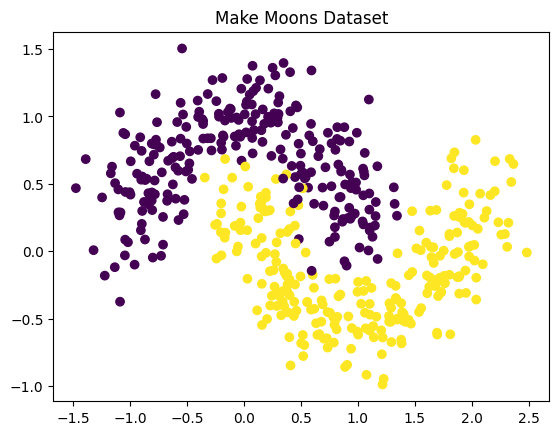

Epoch 1/10


/Users/rithwanali/Documents/Backpropagation/Backpropagation-Visualizer/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5179 - loss: 0.7273 - val_accuracy: 0.5700 - val_loss: 0.6826
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5006 - loss: 0.7025 - val_accuracy: 0.5700 - val_loss: 0.6542
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5094 - loss: 0.6662 - val_accuracy: 0.5700 - val_loss: 0.6296
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4509 - loss: 0.6724 - val_accuracy: 0.5900 - val_loss: 0.6060
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4837 - loss: 0.6379 - val_accuracy: 0.5800 - val_loss: 0.5836
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4540 - loss: 0.6299 - val_accuracy: 0.5800 - val_loss: 0.5629
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4906 - loss: 0.6315 - val_accuracy: 0.5800 - val_loss: 0.5435
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 0.5736 - val_accuracy: 0.5800 - val_loss: 0.5231
Epo

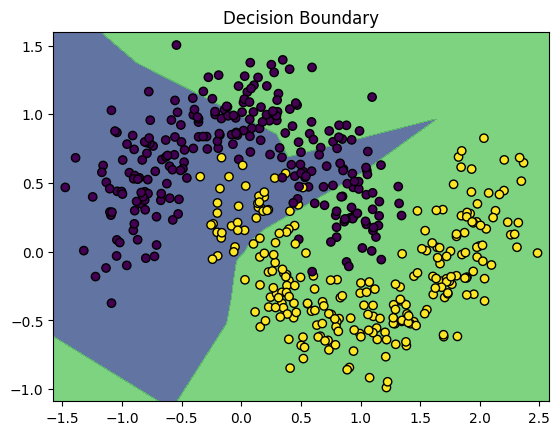

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Define ANN function
def create_three_layer_ann(input_dim=10, hidden_units=8, output_dim=1):
    model = Sequential([
        Dense(units=hidden_units, activation='relu', input_dim=input_dim, kernel_initializer='he_normal'),
        Dense(units=hidden_units//2, activation='relu', kernel_initializer='he_normal'),
        Dense(units=output_dim, activation='sigmoid' if output_dim == 1 else 'softmax', kernel_initializer='glorot_normal')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy' if output_dim == 1 else 'categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Generate dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Make Moons Dataset")
plt.show()

# Create and train the model
model = create_three_layer_ann(input_dim=2, hidden_units=8, output_dim=1)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Visualize decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='viridis', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Decision Boundary")
plt.show()


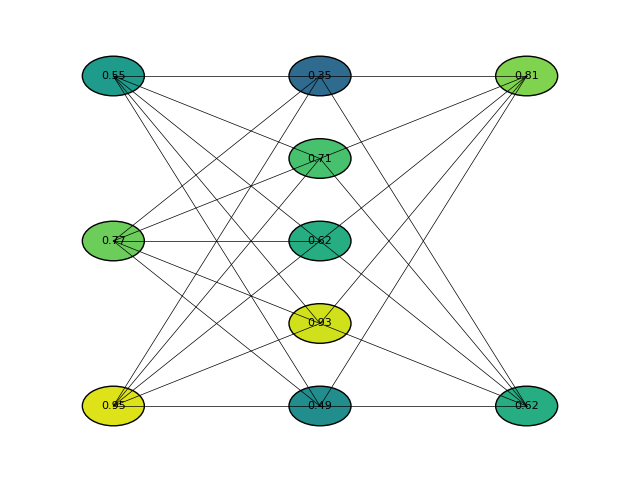

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

def visualize_ann(nodes, activations, ax):
    """Visualize a simple ANN with activations."""
    ax.clear()

    # Define layer positions
    layer_x = [i * 2 for i in range(len(nodes))]
    max_nodes = max(nodes)

    # Draw nodes
    for i, num_nodes in enumerate(nodes):
        y_positions = np.linspace(0, max_nodes, num_nodes)
        for j, y in enumerate(y_positions):
            activation = activations[i][j]
            circle = plt.Circle((layer_x[i], y), 0.3, color=plt.cm.viridis(activation), ec="k")
            ax.add_artist(circle)
            ax.text(layer_x[i], y, f"{activation:.2f}", ha='center', va='center', fontsize=8)

    # Draw connections
    for i in range(len(nodes) - 1):
        y_positions_1 = np.linspace(0, max_nodes, nodes[i])
        y_positions_2 = np.linspace(0, max_nodes, nodes[i + 1])
        for j, y1 in enumerate(y_positions_1):
            for k, y2 in enumerate(y_positions_2):
                ax.plot([layer_x[i], layer_x[i + 1]], [y1, y2], 'k-', lw=0.5)

    ax.set_xlim(-1, max(layer_x) + 1)
    ax.set_ylim(-1, max_nodes + 1)
    ax.axis('off')

# Example: 3-layer ANN with activation values
nodes = [3, 5, 2]  # Number of neurons per layer
activations = [
    np.random.rand(3),  # Input layer activations
    np.random.rand(5),  # Hidden layer activations
    np.random.rand(2)   # Output layer activations
]

fig, ax = plt.subplots(figsize=(8, 6))
visualize_ann(nodes, activations, ax)
plt.show()
